### Import necessary modules:

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading the excel file:

In [88]:
xls = pd.ExcelFile('/Users/roopa/Downloads/KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel(xls, 'CustomerDemographic')
df2 = pd.read_excel(xls, 'Transactions')
df3 = pd.read_excel(xls, 'CustomerAddress')

### Data Preprocessing:

#### Dataset 1: Customer Demographics

In [89]:
# Removing the first row above the actual header row
df1.rename(columns=df1.iloc[0], inplace = True)
df1.drop([0], inplace = True)

In [90]:
# Viewing the dimensions of the dataset
print(df1.shape)

(4000, 13)


In [91]:
# Checking the first few rows of the dataset
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [92]:
# Checking datatypes of the columns
df1.dtypes

customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                 object
dtype: object

In [93]:
# Statistics summary of the dataset
df1.describe(include='all')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,4000,Timmie,Pristnor,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


In [94]:
# Finding the missing values count for each column
df1.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

We have got an overview of datatypes as well as missing values in each of the columns. Let's go ahead and check if there are any irrelevant data present 

In [95]:
# Finding categories in gender column
df1['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [96]:
# Finding categories in job industry column
df1['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [97]:
# Finding categories in wealth segment column
df1['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [98]:
# Finding categories in deceased indicator column
df1['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [99]:
# Finding the value of deceased_indicator when DOB is out of range or irrelevant
df1.loc[df1['DOB'] == '1843-12-21', 'deceased_indicator'].iloc[0]

'N'

In [100]:
# Finding categories in owns_car column
df1['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [101]:
# Finding categories in tenure column
df1['tenure'].value_counts()

7     235
5     228
11    221
10    218
16    215
8     211
18    208
12    202
14    200
9     200
6     192
4     191
13    191
17    182
15    179
1     166
3     160
19    159
2     150
20     96
22     55
21     54
Name: tenure, dtype: int64

##### Findings:
1. Last Names of 125 customers are missing
2. Gender column contains invalid categories
3. Purchase details of past 3 years is not given as numerical column
4. Date of birth details is missing for 87 customers
5. Date of birth details of customer_id 34 is irrelevant
6. Job Title of 506 customers are missing
7. Job Industry Category of 656 customers are denoted as 'n/a'
8. Default values are incomprehensible
9. There are 302 missing values in the default column
10. Tenure details of 87 customers are missing
11. deceased_indicator column shows value as 'N' for the invalid DOB value '1843-12-21' which is not quite possible logically


Let's now go ahead and correct these issues:

In [102]:
#Removing missing values 
df1.dropna(how="all",inplace = True)

In [103]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [104]:
# We can classify gender into 3 groups:
df1['gender'].replace('Femal', 'Female',inplace=True)
df1['gender'].replace('F', 'Female',inplace=True)
df1['gender'].replace('U', 'Other',inplace=True)
df1['gender'].replace('M', 'Male',inplace=True)

In [105]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [106]:
# Finding categories in gender column
df1['gender'].value_counts()

Female    2039
Male      1873
Other       88
Name: gender, dtype: int64

In [107]:
# Converting to numerical datatype
df1.past_3_years_bike_related_purchases = pd.to_numeric(df1.past_3_years_bike_related_purchases, errors='coerce')

In [108]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [109]:
# Deleting irrelevant customer  with DOB in 1843-12-21
df1 = df1.drop(df1[df1["customer_id"] == 34].index)

In [110]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [111]:
# Calculating Age from DOB
import datetime as dt
from datetime import datetime
df1['DOB'] =  pd.to_datetime(df1['DOB'], format='%d%b%Y:%H:%M:%S.%f')
now = pd.to_datetime('now')
df1['Age'] = (now.year - df1['DOB'].dt.year) - ((now.month - df1['DOB'].dt.month) < 0)

In [112]:
# Converting to numerical datatype
df1['Age'] = df1['Age'].dropna().apply(np.int64)

In [113]:
#Adding a new column 'AGE GROUP'
df1.loc[df1['Age'] >= 55, 'Age Group'] = 'Senior'
df1.loc[df1['Age'] < 55, 'Age Group'] = 'Adult'

In [114]:
#Adding a new column 'AGE GROUP'
df1.loc[df1['tenure'] >= 12, 'Tenure Group'] = 'Long Term'
df1.loc[df1['tenure'] < 12, 'Tenure Group'] = 'Short Term'

In [115]:
# Dropping the first name, last name,DOB and default column
df1.drop(['first_name','last_name','DOB','default','Age','job_title','tenure'], axis=1, inplace=True)

In [116]:
df1.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group
1,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term
2,2,Male,81,Financial Services,Mass Customer,N,Yes,Adult,Long Term
3,3,Male,61,Property,Mass Customer,N,Yes,Senior,Long Term
4,4,Male,33,IT,Mass Customer,N,No,Senior,Short Term
5,5,Female,56,NaN,Affluent Customer,N,Yes,Adult,Short Term


#### Dataset 2: Transactions

In [117]:
# Removing the first row above the actual header row
df2.rename(columns=df2.iloc[0], inplace = True)
df2.drop([0], inplace = True)

In [118]:
# Viewing the dimensions of the dataset
print(df2.shape)

(20000, 13)


In [119]:
# Checking the first few rows of the dataset
df2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [120]:
# Checking datatypes of the columns
df2.dtypes

transaction_id             object
product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

In [121]:
# Statistics summary of the dataset
df2.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,20000,0,2476,2017-08-18 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [122]:
df2.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We have got an overview of datatypes as well as missing values in each of the columns. 
Lets go ahead and check if there are any irrelevant data present 

In [123]:
# Finding categories in online_order column
df2['online_order'].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [124]:
# Finding categories in order_status column
df2['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [125]:
# Finding categories in brand column
df2['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [126]:
# Finding categories in product_line column
df2['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [127]:
# Finding categories in product_class column
df2['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [128]:
# Finding categories in product_size column
df2['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

##### Findings:
1. transaction_date column is not in date format
2. Online order information of 360 transactions are missing
3. Product brand information of 197 transactions are missing
4. Product line information of 197 transactions are missing
5. Product class information of 197 transactions are missing
6. Product size information of 197 transactions are missing
7. list_price column is not having numerical datatype
8. standard cost of 197 transactions are missing
9. standard_cost column is not having numerical datatype
10. product_first_sold_date is not in date format
11. product_first_sold_date of 197 transactions are missing

#### Dataset 3 : Customer Address

In [129]:
# Removing the first row above the actual header row
df3.rename(columns=df3.iloc[0], inplace = True)
df3.drop([0], inplace = True)

In [130]:
# Viewing the dimensions of the dataset
print(df3.shape)

(3999, 6)


In [131]:
# Checking the first few rows of the dataset
df3.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [132]:
# Checking datatypes of the columns
df3.dtypes

customer_id           object
address               object
postcode              object
state                 object
country               object
property_valuation    object
dtype: object

In [133]:
# Statistics summary of the dataset
df3.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,4003,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [134]:
# Checking missing values count for each column
df3.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

We have got an overview of datatypes as well as missing values in each of the columns. 
Lets go ahead and check if there are any irrelevant data present 

In [135]:
# Finding categories in state column
df3['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [136]:
# Finding categories in property_valuation column
df3['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

The data quality of Customer_Address dataset seems to be correct. But, in total, there are some missing values of customer information when these datasets are merged. Let's go ahead and check that.

In [137]:
result = pd.merge(df1, df3, how='left', on=['customer_id'])
result.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group,address,postcode,state,country,property_valuation
0,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Male,81,Financial Services,Mass Customer,N,Yes,Adult,Long Term,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Male,61,Property,Mass Customer,N,Yes,Senior,Long Term,NaN,NaN,NaN,NaN,NaN
3,4,Male,33,IT,Mass Customer,N,No,Senior,Short Term,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Female,56,NaN,Affluent Customer,N,Yes,Adult,Short Term,17979 Del Mar Point,2448,New South Wales,Australia,4


In [138]:
# Statistics summary of the resultant dataset
result.describe(include='all')

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group,address,postcode,state,country,property_valuation
count,3999.0,3999,3999.000000,3343,3999,3999,3999,3912,3912,3995,3995.0,3995,3995,3995.0
unique,3999.0,3,NaN,9,3,2,2,2,2,3992,873.0,5,1,12.0
top,4000.0,Female,NaN,Manufacturing,Mass Customer,N,Yes,Adult,Short Term,3 Talisman Place,2170.0,NSW,Australia,9.0
freq,1.0,2039,NaN,799,2000,3997,2024,3112,2172,2,31.0,2052,3995,647.0
mean,NaN,NaN,48.887472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,28.718151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Checking missing values count for each column
result.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
Age Group                               87
Tenure Group                            87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

##### Findings:
1. Address details of 4 customers are missing
2. Postcode details of 4 customers are missing
3. State details of 4 customers are missing
4. Country details of 4 customers are missing
5. Property_valuation details of 4 customers are missing

Let's try merging Customer_Demographics and Transactions dataset

In [140]:
result1 = pd.merge(df1, df2, how='left', on=['customer_id'])
result1.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group,transaction_id,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,94,...,2017-12-23 00:00:00,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482
1,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,3765,...,2017-04-06 00:00:00,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526
2,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,5157,...,2017-05-11 00:00:00,True,Approved,Trek Bicycles,Road,low,small,1720.7,1531.42,37823
3,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,9785,...,2017-01-05 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873
4,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,13424,...,2017-02-21 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573


In [141]:
# Finding the value of customer_id when there is no purchase history for last 3 years
temp = df1[df1['past_3_years_bike_related_purchases']==0]['customer_id']
temp

279      279
310      310
428      428
460      460
475      475
486      486
572      572
602      602
929      929
981      981
1016    1016
1042    1042
1046    1046
1195    1195
1214    1214
1291    1291
1300    1300
1354    1354
1529    1529
1942    1942
2070    2070
2236    2236
2239    2239
2360    2360
2411    2411
2551    2551
2680    2680
2712    2712
2720    2720
2777    2777
2805    2805
2920    2920
3143    3143
3247    3247
3549    3549
3646    3646
3843    3843
3976    3976
Name: customer_id, dtype: object

Let's randomly check if these customers without any purchase history for last 3 years, are present in the transactions dataset

In [142]:
for i in temp:
    print('Customer ID:',i,'\n',result1[result1['customer_id']==i]['transaction_date'])

Customer ID: 279 
 1628    2017-05-03 00:00:00
1629    2017-01-30 00:00:00
1630    2017-02-01 00:00:00
1631    2017-12-16 00:00:00
1632    2017-05-17 00:00:00
1633    2017-06-22 00:00:00
Name: transaction_date, dtype: object
Customer ID: 310 
 1794    2017-09-28 00:00:00
1795    2017-12-22 00:00:00
1796    2017-07-24 00:00:00
1797    2017-02-07 00:00:00
1798    2017-08-07 00:00:00
1799    2017-01-27 00:00:00
1800    2017-09-19 00:00:00
Name: transaction_date, dtype: object
Customer ID: 428 
 2510    2017-08-06 00:00:00
2511    2017-08-13 00:00:00
2512    2017-01-10 00:00:00
2513    2017-07-11 00:00:00
2514    2017-11-09 00:00:00
2515    2017-03-21 00:00:00
2516    2017-08-31 00:00:00
2517    2017-08-13 00:00:00
Name: transaction_date, dtype: object
Customer ID: 460 
 2701    2017-01-08 00:00:00
2702    2017-10-15 00:00:00
2703    2017-12-13 00:00:00
2704    2017-02-15 00:00:00
Name: transaction_date, dtype: object
Customer ID: 475 
 2797    2017-05-07 00:00:00
2798    2017-03-21 00:00:

#### Findings:

In Customer_Demographics, the following customer id are shown as not having any bike related purchases in the last 3 years. But, in reality, these customer ids are present in the Transactions dataset:

279
310
428
460
475
486
572
602
929
981
1016
1042
1046
1195
1214
1291
1300
1354
1529
1942
2070
2236
2239
2360
2411
2551
2680
2712
2720
2777
2805
2920
3143
3247

In [143]:
final_df = pd.merge(result1, df3, how='left', on=['customer_id'])

In [144]:
final_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group,transaction_id,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,94,...,medium,medium,235.63,125.07,38482,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,3765,...,medium,medium,1577.53,826.51,39526,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,5157,...,low,small,1720.7,1531.42,37823,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,9785,...,medium,medium,360.4,270.3,37873,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,13424,...,medium,medium,71.49,53.62,38573,060 Morning Avenue,2016,New South Wales,Australia,10


In [145]:
final_df.drop(['address','property_valuation'], axis=1, inplace=True)

In [146]:
final_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,Age Group,Tenure Group,transaction_id,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,postcode,state,country
0,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,94,...,OHM Cycles,Standard,medium,medium,235.63,125.07,38482,2016,New South Wales,Australia
1,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,3765,...,Solex,Standard,medium,medium,1577.53,826.51,39526,2016,New South Wales,Australia
2,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,5157,...,Trek Bicycles,Road,low,small,1720.7,1531.42,37823,2016,New South Wales,Australia
3,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,9785,...,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873,2016,New South Wales,Australia
4,1,Female,93,Health,Mass Customer,N,Yes,Senior,Short Term,13424,...,Solex,Standard,medium,medium,71.49,53.62,38573,2016,New South Wales,Australia


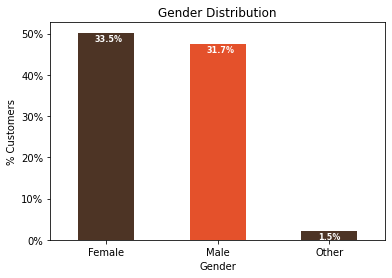

In [147]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
colors = ['#4D3425','#E4512B']
ax = (final_df['gender'].value_counts()*100.0 /len(final_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-2, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=8,
            color='white',
           weight = 'bold')

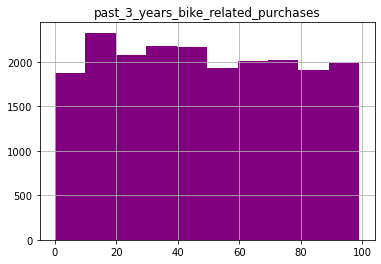

In [148]:
%matplotlib inline
final_df.hist(color='purple')
plt.show()

In [149]:
sales_Dup=final_df[['transaction_id','product_id','product_line','brand','past_3_years_bike_related_purchases','transaction_date','list_price','customer_id','state']]

In [150]:
sales_Dup.drop_duplicates().head()

,transaction_id,product_id,product_line,brand,past_3_years_bike_related_purchases,transaction_date,list_price,customer_id,state
0,94,86,Standard,OHM Cycles,93,2017-12-23 00:00:00,235.63,1,New South Wales
1,3765,38,Standard,Solex,93,2017-04-06 00:00:00,1577.53,1,New South Wales
2,5157,47,Road,Trek Bicycles,93,2017-05-11 00:00:00,1720.7,1,New South Wales
3,9785,72,Standard,Norco Bicycles,93,2017-01-05 00:00:00,360.4,1,New South Wales
4,13424,2,Standard,Solex,93,2017-02-21 00:00:00,71.49,1,New South Wales


In [151]:
sales_Dup['TotalPrice'] = sales_Dup['past_3_years_bike_related_purchases'] * sales_Dup['list_price']
print(sales_Dup.shape)
sales_Dup.head(2)

(20495, 10)


C:\Users\roopa\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,transaction_id,product_id,product_line,brand,past_3_years_bike_related_purchases,transaction_date,list_price,customer_id,state,TotalPrice
0,94,86,Standard,OHM Cycles,93,2017-12-23 00:00:00,235.63,1,New South Wales,21913.6
1,3765,38,Standard,Solex,93,2017-04-06 00:00:00,1577.53,1,New South Wales,146710


In [152]:
sales_Dup['transaction_date'] =  pd.to_datetime(sales_Dup['transaction_date'])
sales_Dup.dtypes

C:\Users\roopa\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


transaction_id                                 object
product_id                                     object
product_line                                   object
brand                                          object
past_3_years_bike_related_purchases             int64
transaction_date                       datetime64[ns]
list_price                                     object
customer_id                                    object
state                                          object
TotalPrice                                     object
dtype: object

In [153]:
sales_df = sales_Dup.groupby(['customer_id']).agg({'transaction_date': lambda x:(now-x.max()).days,
                                       'transaction_id':'count',
                                       'TotalPrice':'sum'})

sales_df = sales_df.rename(columns={'transaction_date':'Recency','transaction_id':'Frequency','TotalPrice':'Monetary'})
print(sales_df.shape)
sales_df.head(3)

(3999, 3)


,Recency,Frequency,Monetary
customer_id,,,
1,909.0,11,844853.85
2,1030.0,3,336074.67
3,1004.0,8,603182.03


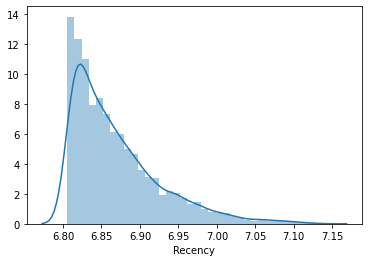

In [154]:

sns.distplot(np.log(sales_df+1)['Recency'])

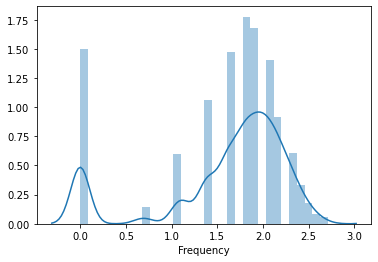

In [155]:
sns.distplot(np.log(sales_df+1)['Frequency'])

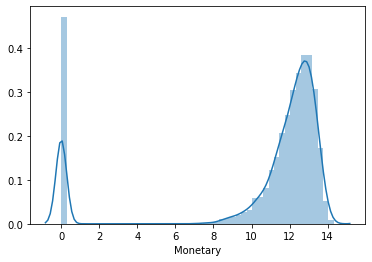

In [156]:
sns.distplot(np.log(sales_df+1)['Monetary'])

In [157]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
scalar = StandardScaler()
scalar.fit(sales_df)
scalar_Df = pd.DataFrame(scalar.transform(sales_df))
scalar_Df.columns = sales_df.columns
scalar_Df.describe()

,Recency,Frequency,Monetary
count,3.492000e+03,3.999000e+03,3.999000e+03
mean,4.875189e-16,-4.466767e-15,-2.422002e-16
std,1.000143e+00,1.000125e+00,1.000125e+00
min,-1.052006e+00,-1.729940e+00,-1.071458e+00
25%,-7.578362e-01,-6.916125e-01,-8.145749e-01
50%,-2.906262e-01,6.058425e-04,-2.459018e-01
75%,4.188409e-01,6.928242e-01,5.725441e-01
max,5.056333e+00,3.115588e+00,5.576609e+00


In [158]:
k_means = KMeans(n_clusters = 3, random_state = 1)

In [159]:
'''Let's see how this works. Apply kmeans on the preprocessed data and get cluster labels for ech row'''
scalar_Df=scalar_Df.dropna()
k_means.fit(scalar_Df)
clus_labels = k_means.labels_
clus_labels

array([1, 2, 1, ..., 2, 0, 2])

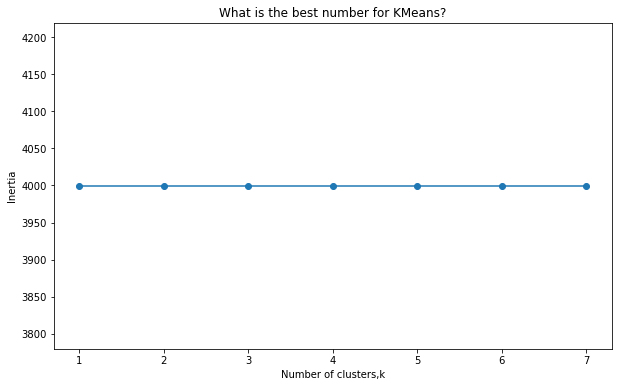

In [160]:
#plot ks vs inertias
ks = range(1,8)
inertias=[]
for k in ks:
    kc = KMeans(n_clusters=k, random_state=1)
    kc.fit(scalar_Df)
    inertias.append(k_means.inertia_)

    
f,ax = plt.subplots(figsize=(10,6))
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('Inertia')
plt.title('What is the best number for KMeans?')
plt.show()

In [161]:
'''We are interested in the non -log tranformed features'''
sales_df_clus2 = sales_df.dropna().assign(Cluster = clus_labels)
print(sales_df_clus2.shape)
sales_df_clus2.head(3)

(3492, 4)


,Recency,Frequency,Monetary,Cluster
customer_id,,,,
1,909.0,11,844853.85,1
2,1030.0,3,336074.67,2
3,1004.0,8,603182.03,1


In [162]:
sales_df_clus2.groupby(['Cluster']).agg({'Recency':['mean','min','max'],'Frequency':['mean','min','max'],'Monetary':['mean','sum']}).round(0)

Recency                Frequency          Monetary             
           mean    min     max      mean min max      mean          sum
Cluster                                                                
0         940.0  902.0  1017.0       5.0   1  14  191411.0  363107387.0
1         943.0  902.0  1089.0       8.0   4  14  623135.0  600702558.0
2        1061.0  984.0  1255.0       4.0   1  10  187419.0  118261631.0

In [163]:
# different customer category and associated sales using K-means
customer_sales=sales_df_clus2.groupby('Cluster').agg({'Recency':['count']})
customer_sales

,Recency
,count
Cluster,
0,1897
1,964
2,631


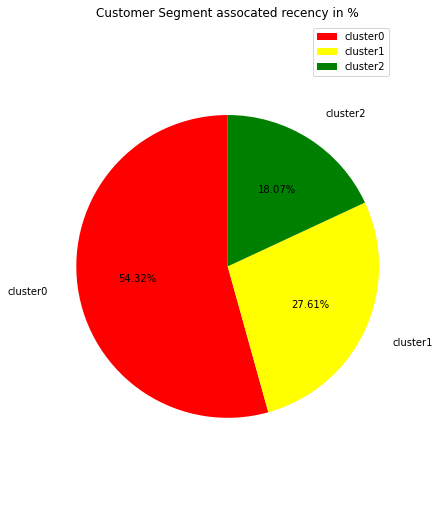

In [164]:
# pie figure
fig=plt.figure(figsize=(6,9))
test=[1897,964,631]
labels = [u'cluster0',u'cluster1',u'cluster2']
colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated recency in %')
plt.show()

In [165]:
quantiles = sales_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [166]:
segmented_rfm = sales_df

In [167]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [170]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,909.0,11,844853.85,1,1,1
2,1030.0,3,336074.67,4,4,2
3,1004.0,8,603182.03,4,1,1
4,1097.0,2,34574.76,4,4,4
5,918.0,6,330579.20,1,2,2


In [172]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
1,909.0,11,844853.85,1,1,1,111
2,1030.0,3,336074.67,4,4,2,442
3,1004.0,8,603182.03,4,1,1,411
4,1097.0,2,34574.76,4,4,4,444
5,918.0,6,330579.20,1,2,2,122


In [181]:

segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
173,917.0,9,1392086.52,1,1,1,111
1460,914.0,8,1346258.08,1,1,1,111
3420,907.0,11,1333003.20,1,1,1,111
1530,903.0,10,1213490.97,1,1,1,111
174,913.0,10,1199102.01,1,1,1,111
2816,910.0,10,1179957.51,1,1,1,111
793,903.0,10,1175262.67,1,1,1,111
2183,910.0,14,1163350.52,1,1,1,111
2464,904.0,13,1136776.68,1,1,1,111


In [ ]:
# different customer category and associated sales using K-means
customer_sales=sales_df_clus2.groupby('Cluster').agg({'Frequency':['count']})
customer_sales

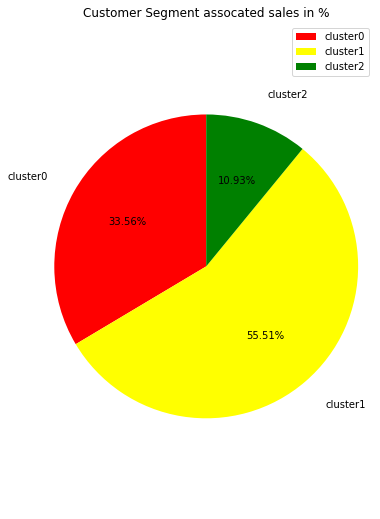

In [182]:
# pie figure
fig=plt.figure(figsize=(6,9))
test=[3.631074e+08,6.007026e+08,1.182616e+08]
labels = [u'cluster0',u'cluster1',u'cluster2']
colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()

In [ ]:
# different customer category and associated sales using K-means
customer_sales=sales_df_clus2.groupby('Cluster').agg({'Monetary':['sum']})
customer_sales

In [ ]:
# pie figure
fig=plt.figure(figsize=(6,9))
test=[3.631074e+08,6.007026e+08,1.182616e+08]
labels = [u'cluster0',u'cluster1',u'cluster2']
colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()

In [ ]:
sales_df_clus2['is_1'] = sales_df_clus2.Cluster==1
sales_df_clus2['is_1'].gender.value_counts()